<a href="https://colab.research.google.com/github/DenilsonUFPA/LSTM/blob/main/Artigo_SBA_LSTM_Nivel_j.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
#@title **Bibliotecas Gerais**

from numpy import array_split
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import keras
from keras.layers import LSTM
from keras.layers import Dense
from keras.models import load_model
from keras.models import Sequential
from sklearn.metrics import r2_score as R2
import joblib
# !pip install geopandas


In [ ]:
! git clone https://github.com/DenilsonUFPA/LSTM.git

fatal: destination path 'LSTM' already exists and is not an empty directory.


In [ ]:
y_teste1 = pd.read_excel('/content/LSTM/y_teste1.xlsx').values
X_test = pd.read_excel('/content/LSTM/X_teste1.xlsx').values
X_teste = pd.read_excel('/content/LSTM/X_teste.xlsx').values

X_teste1 = X_test.reshape((22759,24,2))
X_teste = X_teste.reshape((22759,24,3))

model1 =load_model('/content/LSTM/model1_10_passos.h5')
model2 =load_model('/content/LSTM/model2_10_passos.h5')
model3 =load_model('/content/LSTM/model3_10_passos.h5')

resultado1 = joblib.load('/content/LSTM/resultado1__10_passos.joblib')
resultado2 = joblib.load('/content/LSTM/resultado2__10_passos.joblib')
resultado3 = joblib.load('/content/LSTM/resultado3__10_passos.joblib')

In [ ]:
yp1 = model1.predict(X_teste1)
yp2 = model2.predict(X_teste1)
yp3 = model3.predict(X_teste)

712/712 [==============================] - 5s 6ms/step


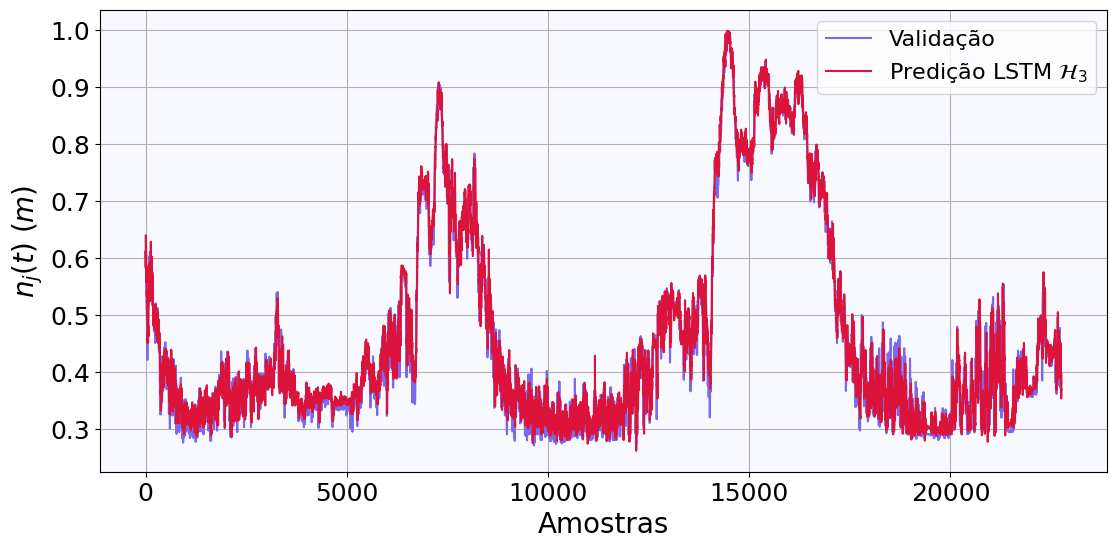

In [ ]:
#@title **Grafico expandido (ok)**
cor_trein = "Teal"
cor_valid = "Chocolate"
fundo='GhostWhite'

dia_expand = 9

fundo='GhostWhite'
plt.figure(figsize = (13,6))
plt.plot(y_teste1[:,dia_expand],'MediumSlateBlue' ,label = 'Validação')
plt.plot(yp3[:,dia_expand], 'Crimson',label = 'Predição LSTM $\mathcal{H}_3$')
plt.ylabel('$n_j (t)$ $(m)$',fontsize = '20')
plt.xlabel('Amostras',fontsize = '20')
plt.tick_params(labelsize=18)
plt.grid()
plt.legend(fontsize ='16' )
plt.gca().set_facecolor(fundo)
# plt.savefig('Grafico expandido modelo 3 - 10° Amostra.jpg')
plt.show()

# usar o primeiro e a decima amostra

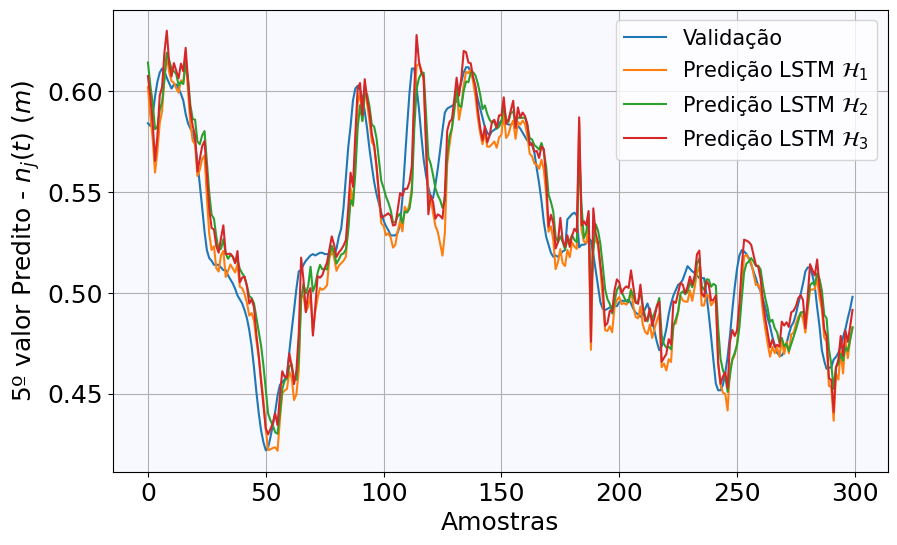

In [ ]:
plt.figure(figsize = (10,6))

dia = 4

plt.plot(y_teste1[0:300,dia], label = 'Validação')
plt.plot(yp1[0:300,dia], label = 'Predição LSTM $\mathcal{H}_1$')
plt.plot(yp2[0:300,dia], label = 'Predição LSTM $\mathcal{H}_2$')
plt.plot(yp3[0:300,dia], label = 'Predição LSTM $\mathcal{H}_3$')
plt.xlabel('Amostras',fontsize='18')
plt.ylabel('5º valor Predito - $n_j (t)$ $(m)$',fontsize='18')
plt.tick_params(labelsize=18)
plt.grid()
plt.legend(fontsize='15')
plt.gca().set_facecolor(fundo)
# plt.savefig('Grafico detalhado 5° dia.jpg')
plt.show()


In [ ]:
#@title **te**
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

cor_trein = "Teal"
cor_valid = "OrangeRed"
esp_linha = 1.5

dia = 0

# Criando o gráfico principal
fig, ax = plt.subplots(figsize=(12,7))
ax.plot(y_teste1[0:300,dia], label = 'Validação')
ax.plot(yp1[0:300,dia], label = 'Predição modelo 1')
ax.plot(yp2[0:300,dia], label = 'Predição modelo 2')
ax.plot(yp3[0:300,dia], label = 'Predição modelo 3')
# ax.set_ylim(-8.3,-4)

ax.set_ylabel('1º valor Predito - Nivel de Jusante',fontsize='15')
ax.set_xlabel('Amostras',fontsize='15')
ax.tick_params(labelsize=18)
ax.grid()
ax.legend(["Custo de treinamento", "Custo de validação"], fontsize='17',bbox_to_anchor=(0.65, -0.08))
ax.set_facecolor(fundo)

# # Criando o zoom
# axin = inset_axes(ax, width="30%", height="30%")
# axin.plot(y_teste1[0:300,dia], cor_trein, linewidth=esp_linha)
# axin.plot(yp1[0:300,dia], cor_trein, linewidth=esp_linha)
# axin.plot(yp2[0:300,dia], cor_trein, linewidth=esp_linha)
# axin.plot(yp3[0:300,dia], cor_trein, linewidth=esp_linha)
# axin.set_xlim(175, 200)  # Ajuste os limites conforme necessário
# axin.set_ylim( 0.5,0.55)  # Ajuste os limites conforme necessário
# axin.grid()

# # Marcando a área de zoom
# mark_inset(ax, axin, loc1=2, loc2=4, fc="AntiqueWhite", ec="0.8")

# # plt.savefig('custo_Modelo1_com_zoom.jpg')
plt.show()

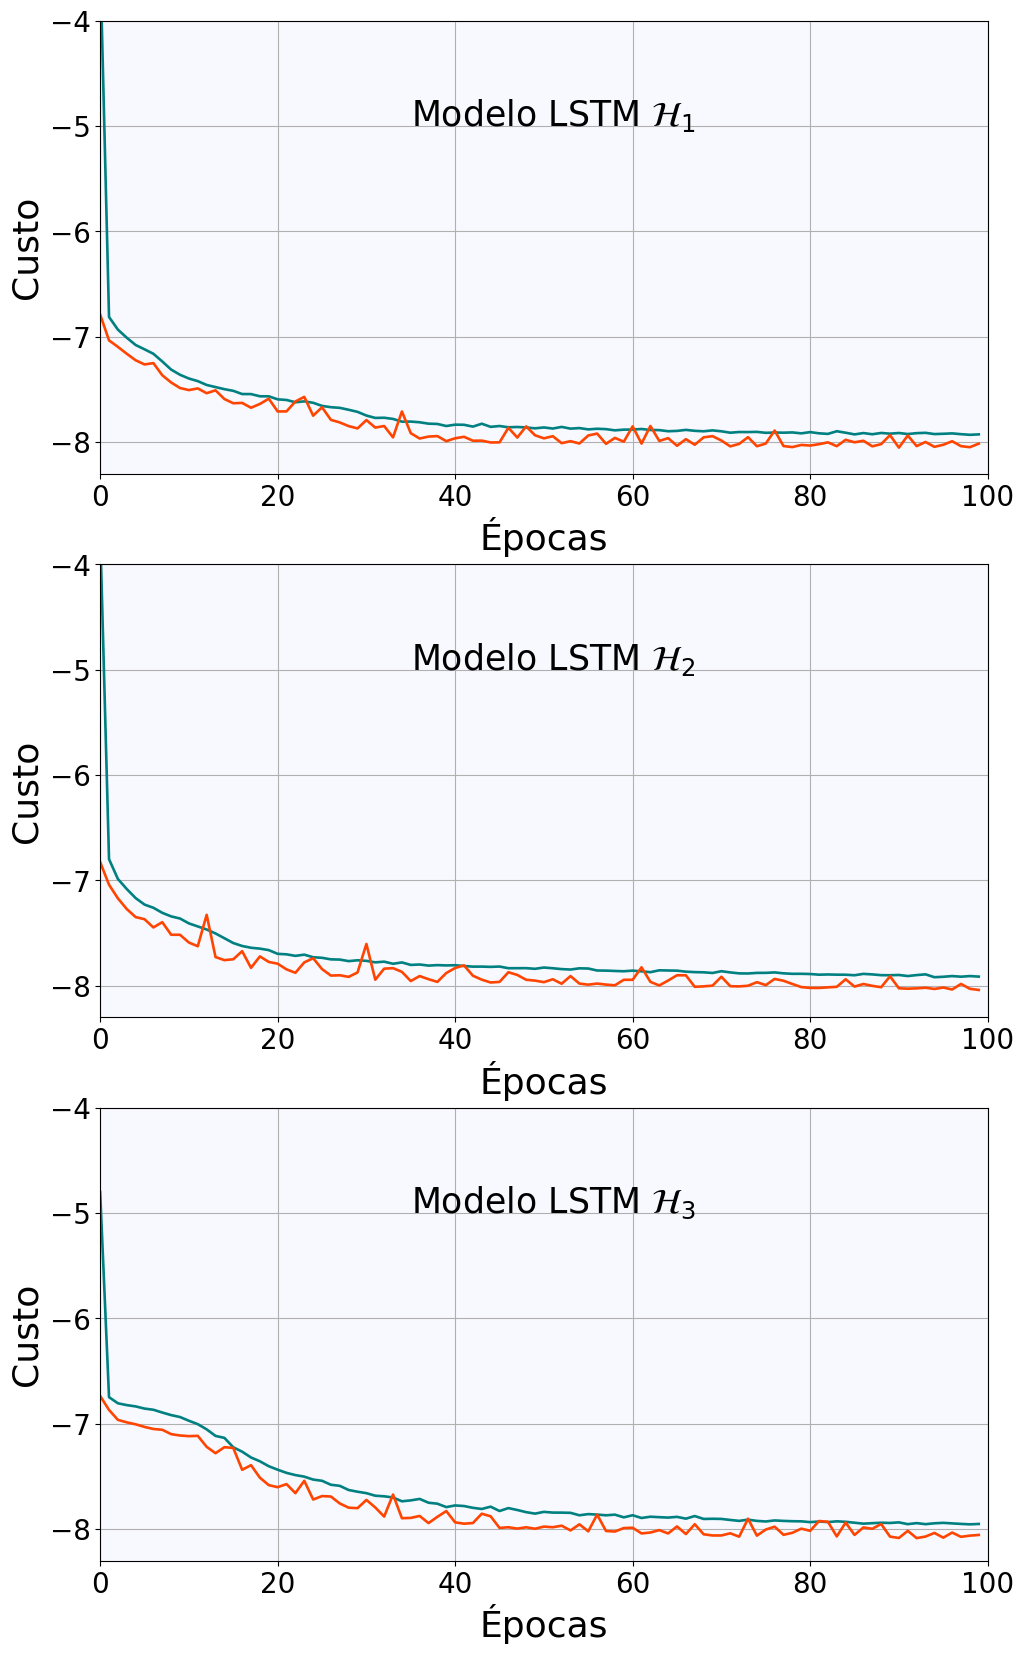

In [117]:
cor_trein = "Teal"
cor_valid = "OrangeRed"
esp_linha = 1.9

fundo='GhostWhite'
plt.figure(figsize=(1,20))

plt.subplots_adjust(right =9)
plt.subplot(311)
plt.plot(np.log(resultado1['loss']), cor_trein,linewidth =esp_linha)
plt.plot(np.log(resultado1['val_loss']), cor_valid,linewidth =esp_linha)
plt.ylim(-8.3,-4) # definir limite do eixo
plt.xlim(0,100)
plt.ylabel("Custo",loc = 'center',fontsize = '26')
plt.xlabel('Épocas', loc = 'center', fontsize ='26')
plt.tick_params(labelsize=20)
plt.text(35, -5, "Modelo LSTM $\mathcal{H}_1$",fontsize ='25')
plt.gca().set_facecolor(fundo)
plt.grid()

plt.subplot(312)
plt.plot(np.log(resultado2['loss']), cor_trein,linewidth =esp_linha)
plt.plot(np.log(resultado2['val_loss']), cor_valid,linewidth =esp_linha)
plt.ylim(-8.3,-4) # definir limite do eixoo
plt.xlim(0,100)
plt.ylabel("Custo",loc = 'center',fontsize = '26')
plt.xlabel('Épocas', loc = 'center', fontsize ='26')
plt.tick_params(labelsize=20)
plt.text(35, -5, "Modelo LSTM $\mathcal{H}_2$",fontsize ='25')
plt.grid(True)
plt.gca().set_facecolor(fundo)

plt.subplot(313)
plt.plot(np.log(resultado3['loss']), cor_trein,linewidth = esp_linha)
plt.plot(np.log(resultado3['val_loss']), cor_valid,linewidth = esp_linha)
plt.ylabel("Custo",loc = 'center',fontsize = '26')
plt.xlabel('Épocas', loc = 'center', fontsize ='26')
plt.ylim(-8.3,-4) # definir limite do eixo
plt.xlim(0,100)
plt.tick_params(labelsize=20)
plt.text(35, -5, "Modelo LSTM $\mathcal{H}_3$",fontsize ='25')
plt.gca().set_facecolor(fundo)
plt.grid()
# plt.legend(["Custo de treinamento", "Custo de validação"],fontsize = '17',bbox_to_anchor=(-0.4, -0.25))
plt.savefig('custo.jpg',dpi = 1000,bbox_inches='tight')

plt.show()

# x numero de ÉPOCAS
# y Custo
# # salvar em subplot
# adicionar o grid
# ajeitar o nome do modelo

In [ ]:
#@title **te**
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

cor_trein = "Teal"
cor_valid = "OrangeRed"
esp_linha = 1.5

# Criando o gráfico principal
fig, ax = plt.subplots(figsize=(12,7))
ax.plot(np.log(resultado3['loss']), cor_trein, linewidth=esp_linha)
ax.plot(np.log(resultado3['val_loss']), cor_valid, linewidth=esp_linha)
ax.set_ylim(-8.3,-4)
ax.set_ylabel("Custo", loc='center', fontsize='24')
ax.set_xlabel('Épocas', loc='center', fontsize='24')
ax.tick_params(labelsize=18)
ax.grid()
ax.legend(["Custo de treinamento", "Custo de validação"], fontsize='17')
ax.set_facecolor(fundo)

# # Criando o zoom
# axin = inset_axes(ax, width="30%", height="30%", loc='center')
# axin.plot(np.log(resultado1['loss']), cor_trein, linewidth=esp_linha)
# axin.plot(np.log(resultado1['val_loss']), cor_valid, linewidth=esp_linha)
# axin.set_xlim(20, 40)  # Ajuste os limites conforme necessário
# axin.set_ylim(-8.3, -7.5)  # Ajuste os limites conforme necessário
# axin.grid()

# # Marcando a área de zoom
# mark_inset(ax, axin, loc1=2, loc2=4, fc="AntiqueWhite", ec="0.8")

plt.savefig('custo_Modelo3.jpg')
plt.show()

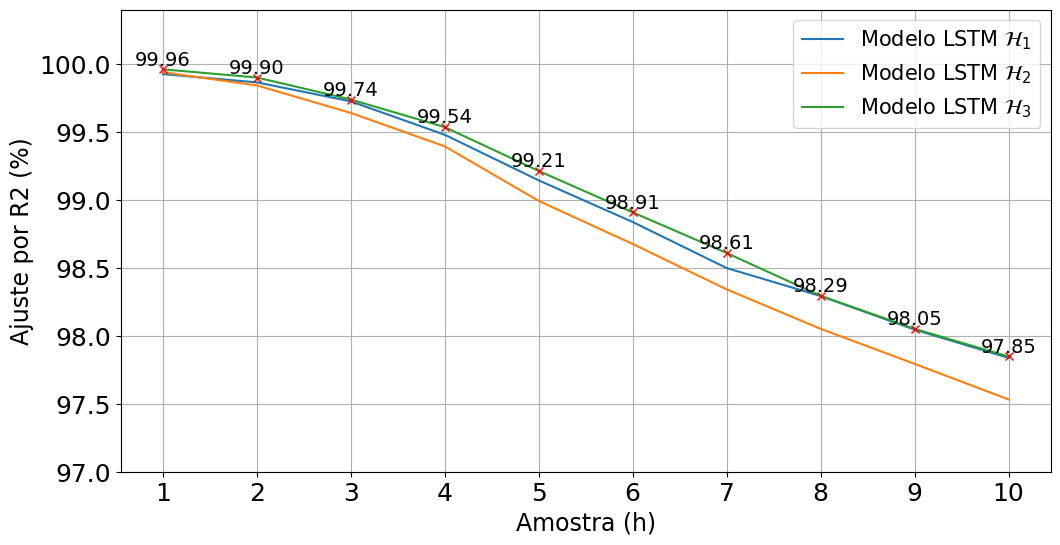

In [ ]:
#@title **Ajuste (ok)**

import numpy as np
import matplotlib.pyplot as plt

N_horas = 10
ajuste1 = np.zeros(N_horas)
ajuste2 = np.zeros(N_horas)
ajuste3 = np.zeros(N_horas)

# Assuming R2 function is defined elsewhere
# You may need to import it or define it

for n in np.arange(0, N_horas):
    ajuste1[n] = 100 * R2(y_teste1[:,n], yp1[:,n])
    ajuste2[n] = 100 * R2(y_teste1[:,n], yp2[:,n])
    ajuste3[n] = 100 * R2(y_teste1[:,n], yp3[:,n])

plt.figure(figsize=(12, 6))

# plt.subplot(311)
# plt.title('Modelo 1')
plt.plot(ajuste1, label='Modelo LSTM $\mathcal{H}_1$')
for i, txt in enumerate(ajuste3):
    plt.text(i, ajuste3[i], '{:.2f}'.format(txt), color ='Black',ha='center', va='bottom', fontsize = '14')
plt.plot(ajuste2, label='Modelo LSTM $\mathcal{H}_2$')
plt.plot(ajuste3, label='Modelo LSTM $\mathcal{H}_3$')
plt.plot(ajuste3, 'xr')
plt.ylim((97, 100.4))
plt.xticks(np.arange(10), np.arange(1, 11))
plt.grid()
plt.tick_params(labelsize=18)
plt.ylabel('Ajuste por R2 (%)',fontsize ='17')
plt.xlabel('Amostra (h)',fontsize ='17')
plt.legend(fontsize ='15')
plt.savefig('ajuste.jpg')
plt.show()

# x
# y Ajuste por R2 (%)
#

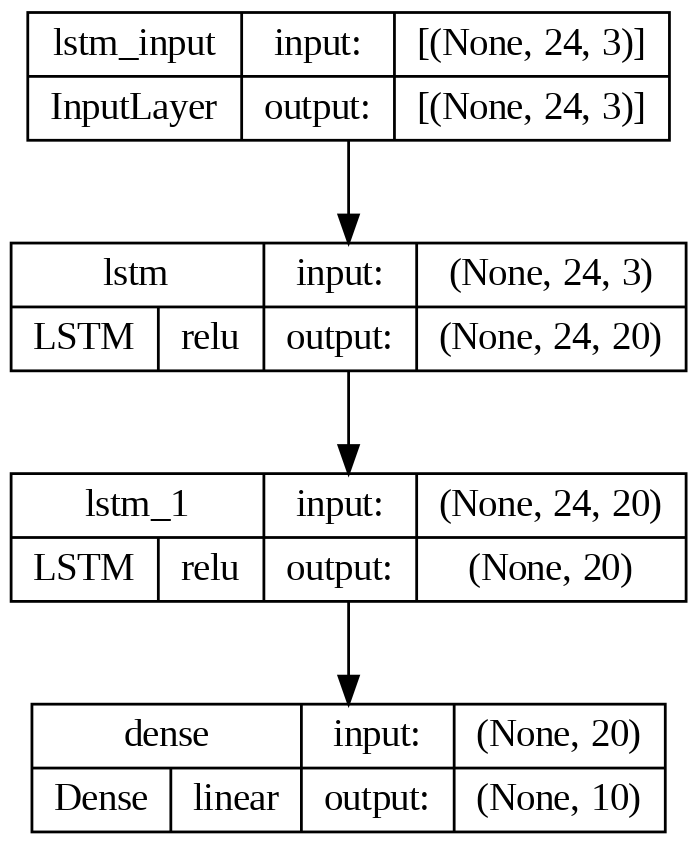

In [120]:
keras.utils.plot_model(
    model3,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=200,
    show_layer_activations=True,
    show_trainable=False,
)